In [24]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
from collections import defaultdict

In [27]:
cm = torch.load("confusion_matrix/cm_librivox_500.pt")
cm = cm.numpy()


In [28]:
cm = np.around(100*cm, 2)

In [29]:
cm

array([[ 0.  , 32.04, 30.14, 32.57, 57.68, 48.14, 44.32, 48.99, 35.89,
        46.05, 32.05],
       [52.38,  0.  , 43.68, 40.01, 52.54, 42.55, 46.37, 47.33, 45.83,
        58.16, 54.3 ],
       [41.79, 37.26,  0.  , 55.03, 59.76, 54.67, 47.13, 54.92, 43.74,
        55.66, 39.82],
       [20.78, 11.16, 28.18,  0.  , 41.58, 26.67, 23.89, 35.84, 21.87,
        30.39,  8.47],
       [20.53,  2.66,  6.86, 13.75,  0.  , 22.33, 16.95, 24.7 , 15.71,
         7.37, 12.08],
       [31.26, 15.45, 30.11, 37.64, 61.26,  0.  , 29.  , 43.13, 31.26,
        35.39, 24.95],
       [44.22, 34.28, 31.67, 44.95, 63.84, 47.03,  0.  , 54.3 , 26.96,
        41.84, 33.24],
       [29.59,  8.38, 20.62, 28.16, 56.51, 44.41, 25.82,  0.  , 26.09,
        24.74, 30.76],
       [13.61, 21.63, 19.5 , 15.84, 19.09, 24.53, 11.71, 21.95,  0.  ,
        29.87, 35.47],
       [45.  , 37.5 , 37.5 , 42.5 , 57.5 , 50.  , 37.5 , 57.5 , 47.5 ,
         0.  , 47.5 ],
       [19.51,  9.14, 25.97, 17.29, 34.43, 19.97, 19.88, 39.

In [30]:
LABELS = dict()
LABELS["seedlings"] = dict()
LABELS["librivox"] = dict()
LABELS["mfccs"] = dict()

LABELS["librivox"][300] = [
    'Male_speech',
    'Laughter',
    'Musical_instrument',
    'Clapping',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Telephone',
    'Domestic_sounds',
    'Knock',
    'Water_tap'
]

LABELS["librivox"][500] = [
    'Male_speech',
    'Laughter',
    'Musical_instrument',
    'Clapping',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Telephone',
    'Domestic_sounds',
    'Knock',
    'Water_tap'
]

LABELS["librivox"][1000] = [
    'Male_speech',
    'Musical_instrument',
    'Laughter',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Clapping',
    'Telephone',
    'Domestic_sounds',
    'Water_tap'
]

LABELS["seedlings"][1000] = [
    'Male_speech',
    'Musical_instrument',
    'Laughter',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Clapping',
    'Telephone',
    'Domestic_sounds',
    'Water_tap'
]

LABELS["seedlings"][500] = [
    'Male_speech',
    'Musical_instrument',
    'Laughter',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Clapping',
    'Telephone',
    'Domestic_sounds',
    'Water_tap'
]

LABELS["seedlings"][300] = [
    'Male_speech',
    'Laughter',
    'Musical_instrument',
    'Clapping',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Telephone',
    'Domestic_sounds',
    'Knock',
    'Water_tap'
]

LABELS["mfccs"][300] = [
    'Male_speech',
    'Laughter',
    'Musical_instrument',
    'Clapping',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Telephone',
    'Domestic_sounds',
    'Knock',
    'Water_tap'
]

LABELS["mfccs"][500] = [
    'Male_speech',
    'Laughter',
    'Musical_instrument',
    'Clapping',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Telephone',
    'Domestic_sounds',
    'Knock',
    'Water_tap'
]

LABELS["mfccs"][1000] = [
    'Male_speech',
    'Musical_instrument',
    'Laughter',
    'Walk_footsteps',
    'Door',
    'Female_speech',
    'Clapping',
    'Telephone',
    'Domestic_sounds',
    'Water_tap'

]

In [31]:
def plot_confusion_matrix(cm, corpus, duration):
    labels = LABELS[corpus][duration]
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(cm)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, cm[i, j],
                        ha="center", va="center", color="w")

    plt.savefig(f"./confusion_matrix/cm_{corpus}_{duration}.png", bbox_inches="tight")
    plt.show()


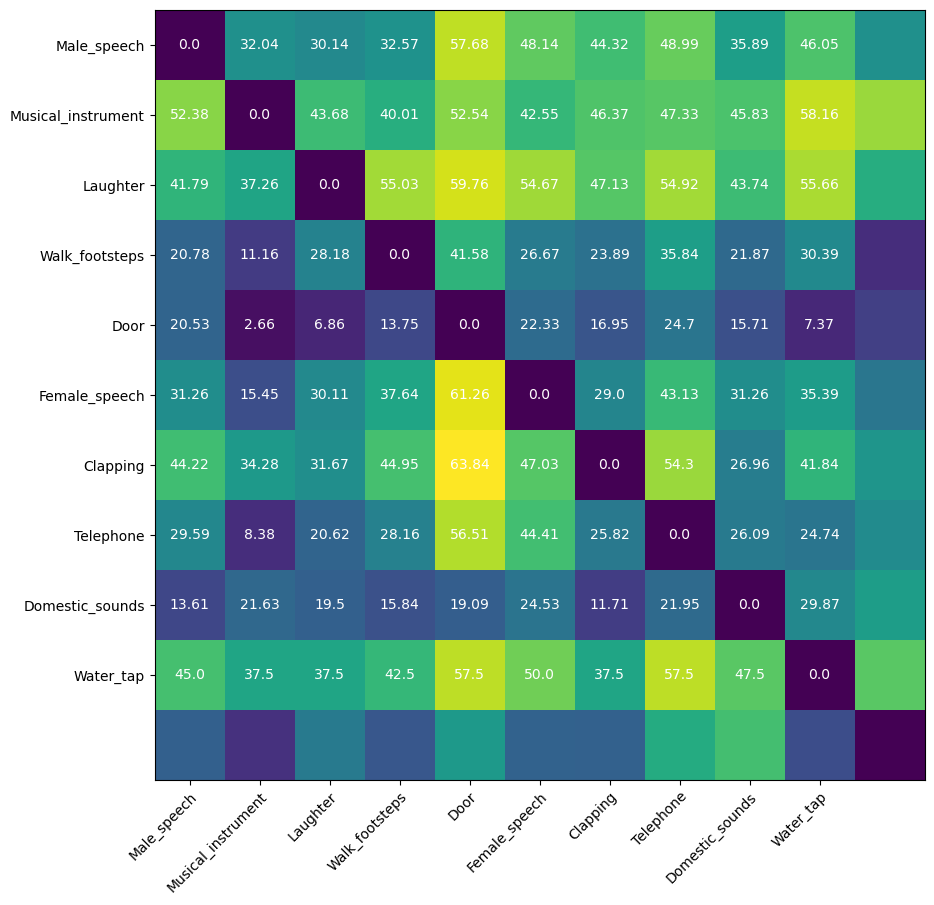

In [32]:
plot_confusion_matrix(cm, "seedlings", 500)

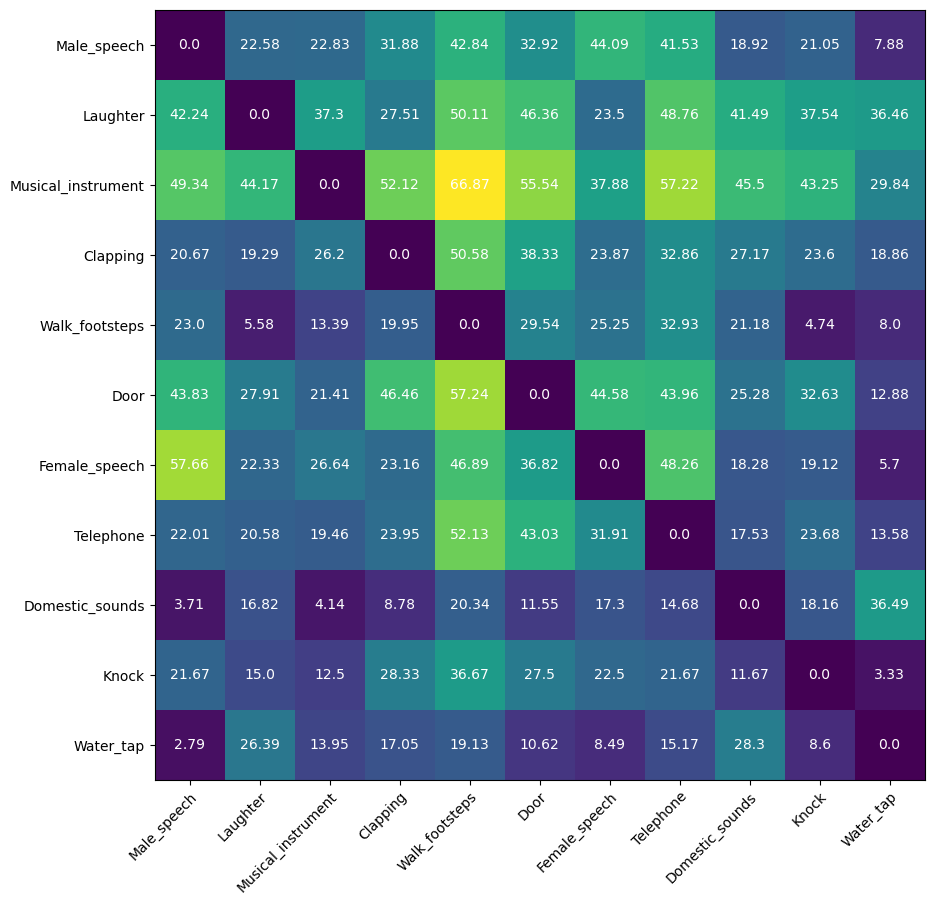

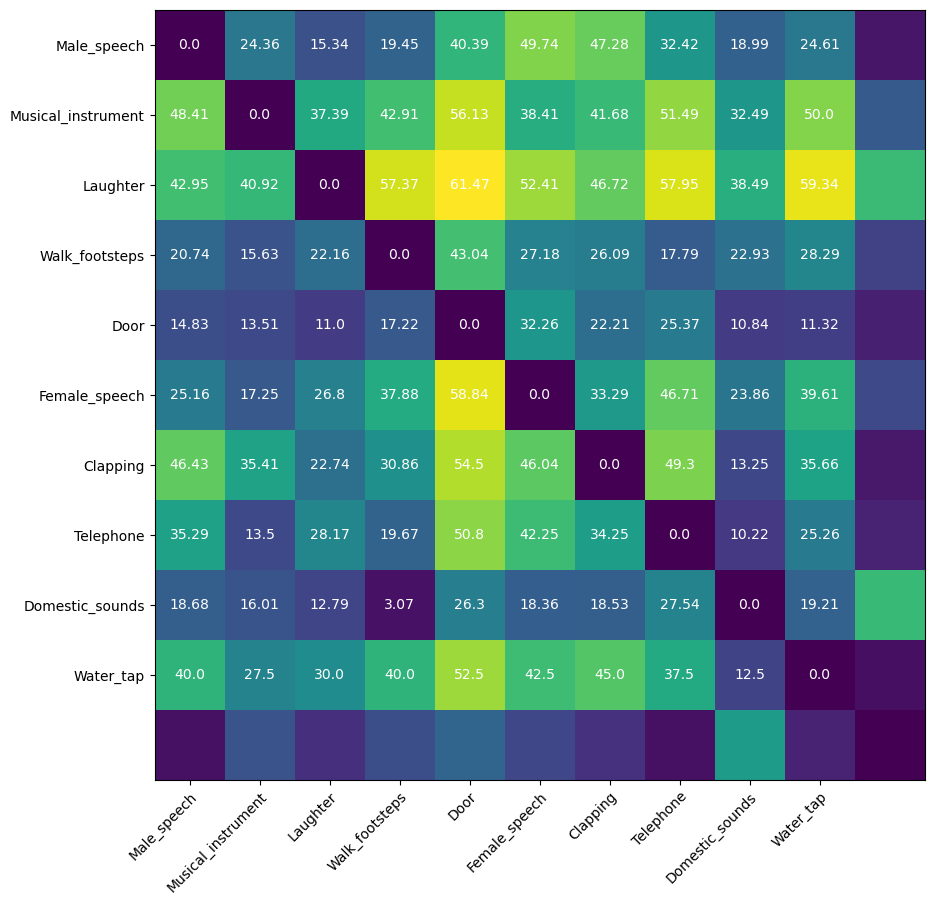

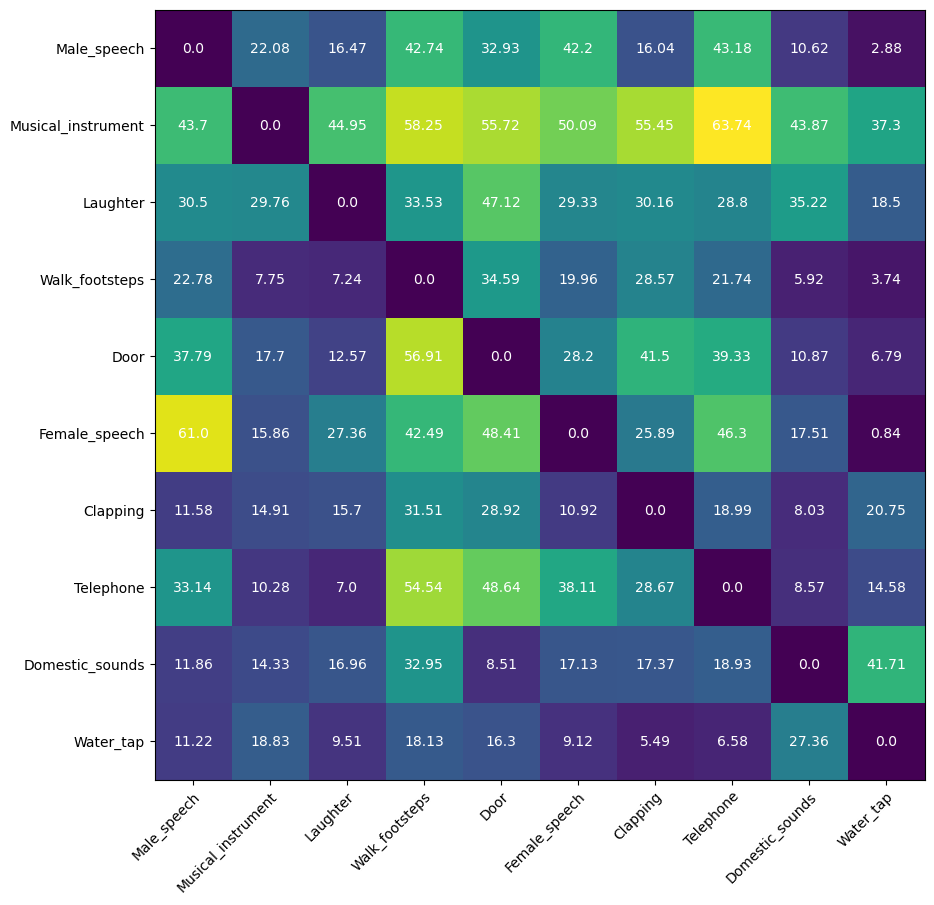

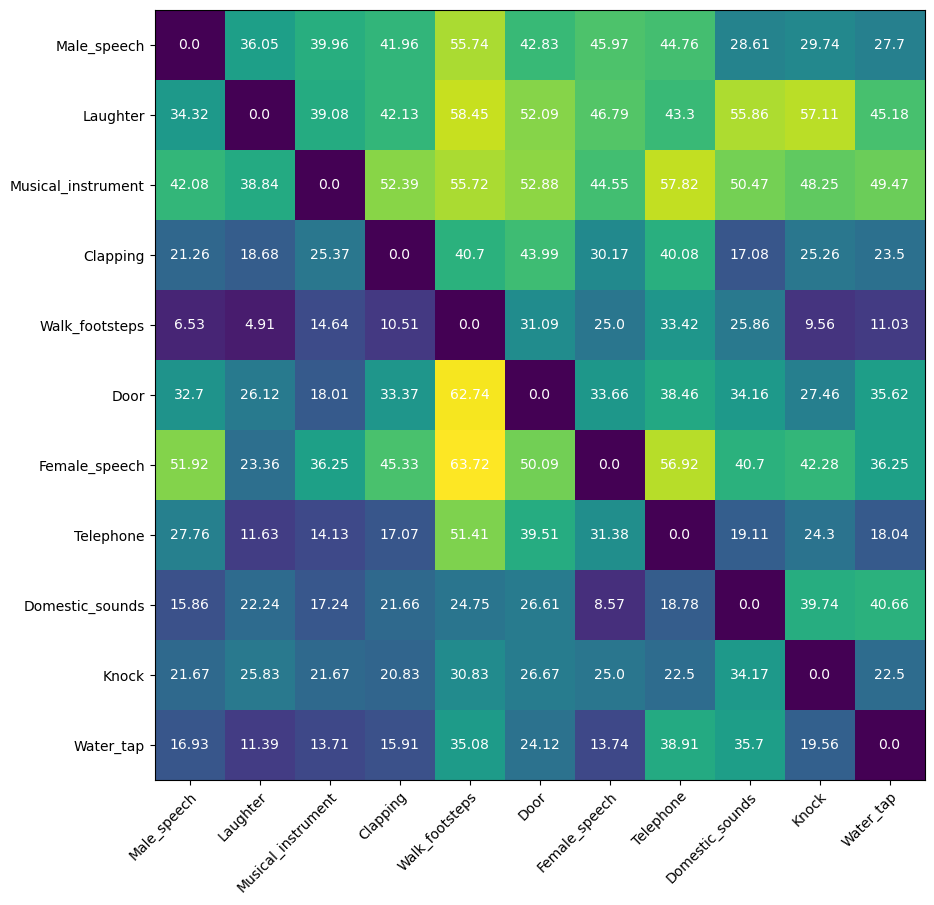

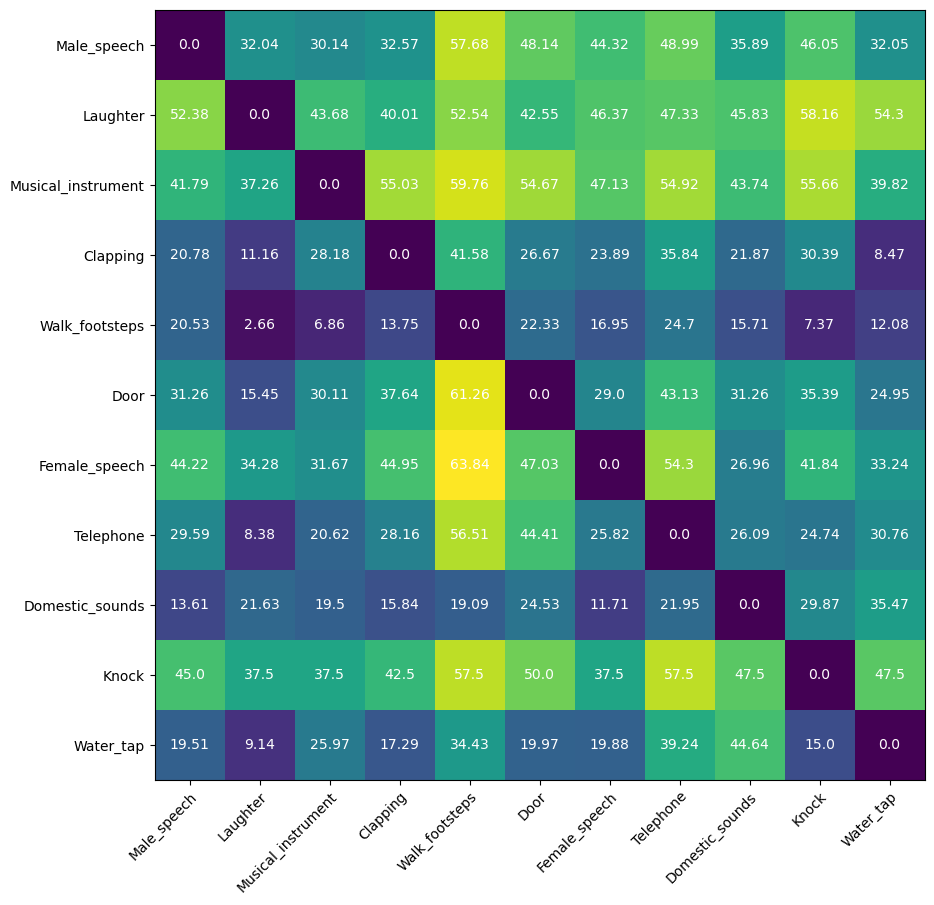

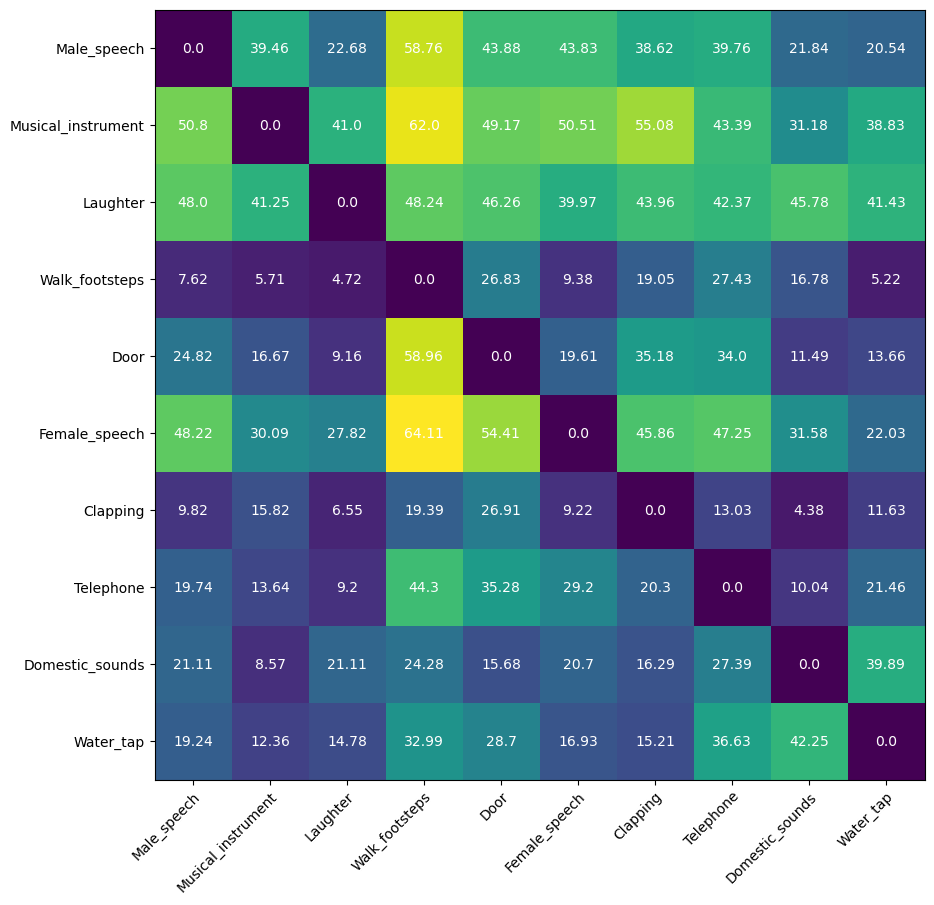

In [33]:
for corpus in ["seedlings", "librivox"]:
    for duration in [300, 500, 1000]:
        cm = torch.load(f"confusion_matrix/cm_{corpus}_{duration}.pt")
        cm = cm.numpy()
        cm = np.around(100*cm, 2)
        plot_confusion_matrix(cm, corpus, duration)